<a href="https://colab.research.google.com/github/asis012/tensorflow_practice/blob/master/tensorflow_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.random(len(x_data))
noise

array([0.82263232, 0.4673982 , 0.5626261 , ..., 0.02408893, 0.320573  ,
       0.96407913])

In [0]:
  # mx + c = y , c= 5

In [0]:
y_true = (0.3 * x_data) + noise + 5

In [0]:
x_df = pd.DataFrame(data=x_data,columns=['X-Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y-Data'])

In [0]:
x_df.head()
y_df.head()
x_df.head()

,X-Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [0]:
my_data = pd.concat([x_df,y_df],axis=1)

In [0]:
my_data.head()

,X-Data,Y-Data
0,0.00000,5.822632
1,0.00001,5.467401
2,0.00002,5.562632
3,0.00003,5.931097
4,0.00004,5.793817


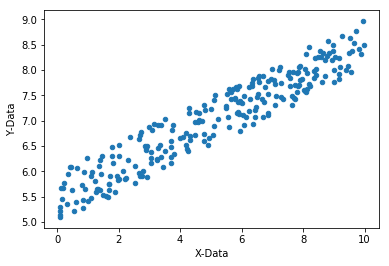

In [0]:
  my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y-Data')

In [0]:
batch_size = 8
#8 points size

In [0]:
m = tf.Variable(0.8)
b = tf.Variable(1.4)

In [0]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])


In [0]:
y_model = m*xph + b

In [0]:
#cost_fun
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()


In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches = 1000
  
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict = feed)
  model_m, model_b = sess.run([m,b])

In [0]:
model_m

0.29880083

In [0]:
y_hat = x_data * model_m + model_b


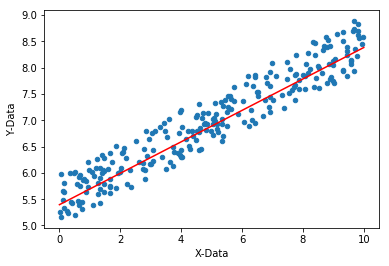

In [0]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y-Data')
plt.plot(x_data,y_hat,'r')

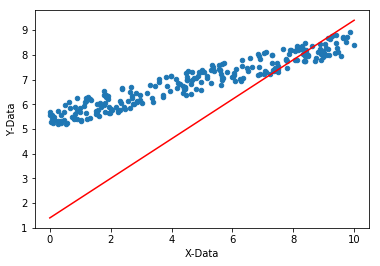

In [0]:
y_model = x_data * 0.8 +1.4



my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y-Data')
plt.plot(x_data,y_model,'r')

In [0]:
#some eztimator api of tensorflow

In [0]:
#features column

feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)


W0713 11:30:20.805780 140465127585664 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpn4r18piz


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_true,test_size = 0.3,random_state= 0 )

In [0]:
x_train.shape

(700000,)

In [0]:
input_funn = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [0]:
#train_input_fun = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [0]:
#test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [0]:
estimator.train(input_fn=input_funn,steps=1000)

W0713 11:31:55.324735 140465127585664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0713 11:31:55.351218 140465127585664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0713 11:31:55.354410 140465127585664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_

In [0]:
# train_metrics = estimator.evaluate(input_fn= train_input_fun,steps=1000)

In [0]:
# test_metrics = estimator.evaluate(input_fn= test_input_func,steps=1000)

In [0]:
# print(input_fun)

In [0]:
input_fu_predict= tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [0]:
estimator.predict(input_fn=input_fu_predict)

<generator object Estimator.predict at 0x7fc04cbdffc0>

In [0]:
list(estimator.predict(input_fn=input_fu_predict))

W0713 11:32:00.802639 140465127585664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


[{'predictions': array([4.7795243], dtype=float32)},
 {'predictions': array([5.2377152], dtype=float32)},
 {'predictions': array([5.695906], dtype=float32)},
 {'predictions': array([6.1540966], dtype=float32)},
 {'predictions': array([6.6122875], dtype=float32)},
 {'predictions': array([7.0704784], dtype=float32)},
 {'predictions': array([7.5286694], dtype=float32)},
 {'predictions': array([7.9868603], dtype=float32)},
 {'predictions': array([8.445051], dtype=float32)},
 {'predictions': array([8.903242], dtype=float32)}]

In [0]:

from tensorflow import keras